In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [2]:
train_dir = "C:/Users/User/Desktop/Project ML/chest_xray/train"
test_dir = "C:/Users/User/Desktop/Project ML/chest_xray/test"
val_dir = "C:/Users/User/Desktop/Project ML/chest_xray/val"
print("Dataset loaded!!")

Dataset loaded!!


In [5]:
print("Train set:")
print("-"*60)
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("\nTest set:")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("\nValidation set")
print('-'*60)
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

pneumonia = os.listdir("C:/Users/User/Desktop/Project ML/chest_xray/train/PNEUMONIA")
pneumonia_dir = "C:/Users/User/Desktop/Project ML/chest_xray/train/PNEUMONIA"

Train set:
------------------------------------------------------------
PNEUMONIA=834
NORMAL=732

Test set:
------------------------------------------------------------
PNEUMONIA=390
NORMAL=234

Validation set
------------------------------------------------------------
PNEUMONIA=8
NORMAL=8


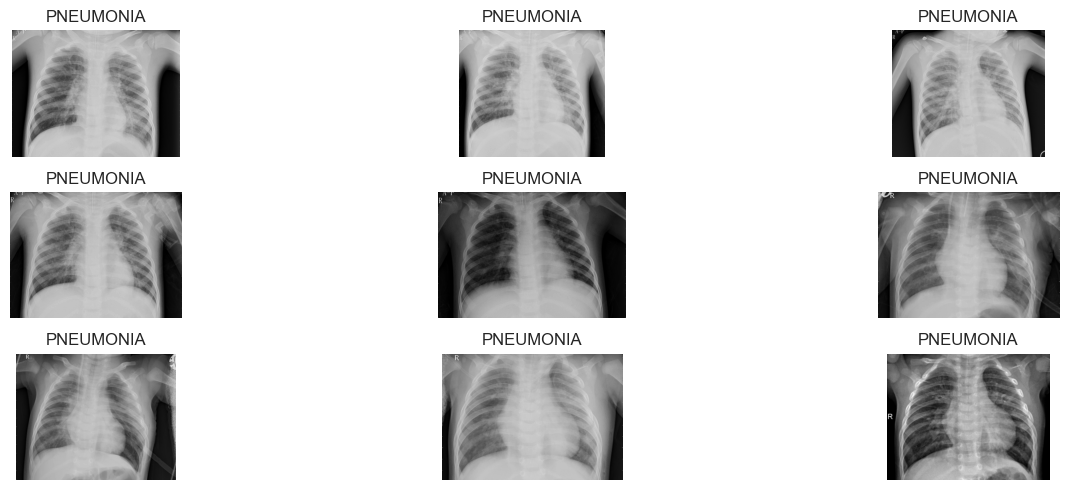

In [6]:
plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("PNEUMONIA")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

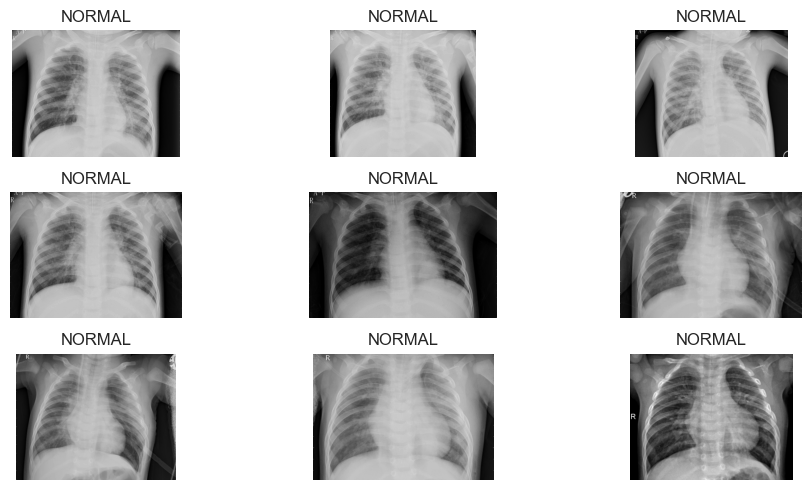

In [7]:
normal = os.listdir("C:/Users/User/Desktop/Project ML/chest_xray/train/NORMAL")
normal_dir = "C:/Users/User/Desktop/Project ML/chest_xray/train/NORMAL"

plt.figure(figsize=(10, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("NORMAL")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

In [8]:
import glob

pneumonia_train = glob.glob(train_dir+"/PNEUMONIA/*.jpeg")
normal_train = glob.glob(train_dir+"/NORMAL/*.jpeg")

In [11]:
data = pd.DataFrame(np.concatenate([[0]*len(normal_train) , [1]*len(pneumonia_train)]),columns=["class"])

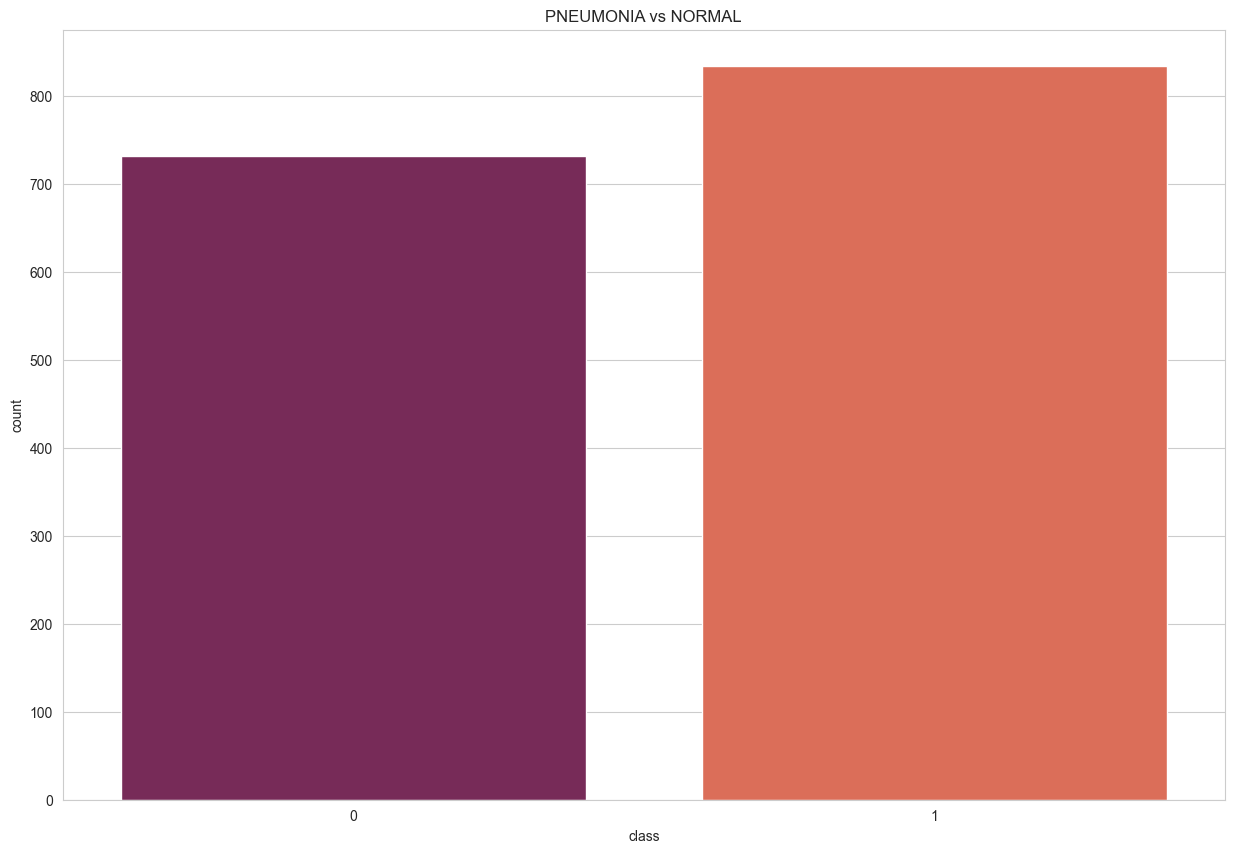

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.countplot(x='class', data=data, palette='rocket')
plt.title('PNEUMONIA vs NORMAL')
plt.show()

In [14]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)


In [15]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=32,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )

validation = val_Datagen.flow_from_directory(val_dir,
                                              batch_size=2,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )

test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )

Found 1566 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
img, label = next(train)

In [17]:
vgg_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

for layer in vgg_model.layers:
    layer.trainable=False
    
x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)

predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)


model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 46s 1us/step


In [18]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,090,177 (76.64 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [19]:
history = model.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.6618 - loss: 0.6305 - val_accuracy: 0.8125 - val_loss: 0.5055 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.7110 - loss: 0.5632 - val_accuracy: 0.8125 - val_loss: 0.4921 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7562 - loss: 0.5012 - val_accuracy: 0.7500 - val_loss: 0.5205 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.7597 - loss: 0.5004 - val_accuracy: 0.8125 - val_loss: 0.4867 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.7765 - loss: 0.4869 - val_accuracy: 0.6250 - val_loss: 0.5875 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7702 - loss: 0.4807 - val_accuracy: 0.8125 - val_loss: 0.4499 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.8173 - loss: 0.

In [20]:

score = model.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

49/49 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.8754 - loss: 0.3027
Train Loss:  0.30741086602211
Train Accuracy:  0.8703703880310059


In [21]:

score = model.evaluate(test)

print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.8644 - loss: 0.3457
Test Loss:  0.36373019218444824
Test Accuracy:  0.8477563858032227


Text(0.5, 1.0, 'Accuracy Evolution')

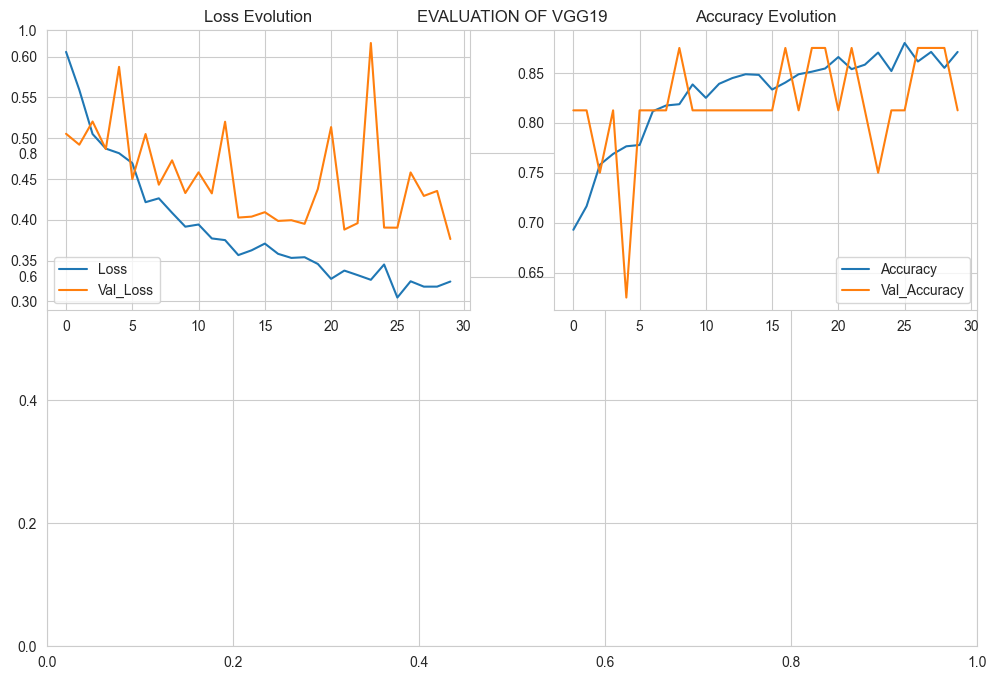

In [22]:
plt.figure(figsize=(12, 8))
plt.title('EVALUATION OF VGG19')

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [29]:
resnet_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',
    include_top = False,
    #input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    layer.trainable=False
    
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)

predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)


model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [30]:
history = model2.fit(train,epochs=30, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 835ms/step - accuracy: 0.8289 - loss: 0.3779 - val_accuracy: 0.9375 - val_loss: 0.2325 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 799ms/step - accuracy: 0.8856 - loss: 0.2730 - val_accuracy: 0.8125 - val_loss: 0.4048 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 808ms/step - accuracy: 0.8975 - loss: 0.2705 - val_accuracy: 0.9375 - val_loss: 0.1795 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 790ms/step - accuracy: 0.9175 - loss: 0.2008 - val_accuracy: 0.9375 - val_loss: 0.1676 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 793ms/step - accuracy: 0.9037 - loss: 0.2130 - val_accuracy: 0.8125 - val_loss: 0.3320 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 796ms/step - accuracy: 0.9066 - loss: 0.2310 - val_accuracy: 0.9375 - val_loss: 0.2044 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 793ms/step - accuracy: 0.9

In [31]:

score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9447 - loss: 0.1502
Train Loss:  0.14339983463287354
Train Accuracy:  0.9469987154006958
312/312 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.8887 - loss: 0.2184

Test loss:  0.2250162959098816
Test Accuracy:  0.9022436141967773


Text(0.5, 1.0, 'Accuracy Evolution')

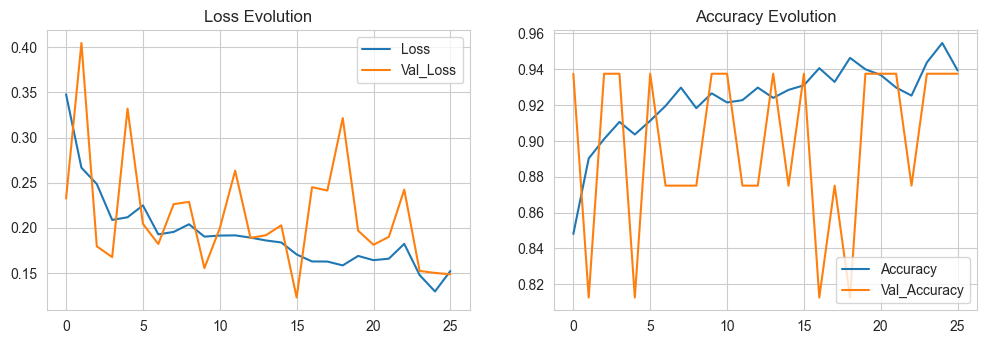

In [32]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [33]:
mobilenet_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

for layer in mobilenet_model.layers:
    layer.trainable=False
    
x = mobilenet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)

predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model3 = tf.keras.Model(inputs=mobilenet_model.input, outputs=predictions)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)


model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [34]:
history = model3.fit(train,epochs=30, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 546ms/step - accuracy: 0.7814 - loss: 0.4556 - val_accuracy: 0.9375 - val_loss: 0.2326 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 533ms/step - accuracy: 0.8960 - loss: 0.2710 - val_accuracy: 0.7500 - val_loss: 0.5601 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 526ms/step - accuracy: 0.8861 - loss: 0.2728 - val_accuracy: 0.8750 - val_loss: 0.2842 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 526ms/step - accuracy: 0.8958 - loss: 0.2566 - val_accuracy: 0.6875 - val_loss: 0.8194 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 523ms/step - accuracy: 0.9004 - loss: 0.2575 - val_accuracy: 0.8125 - val_loss: 0.4495 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 524ms/step - accuracy: 0.9100 - loss: 0.2313 - val_accuracy: 0.8125 - val_loss: 0.6448 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 542ms/step - accuracy: 0.9

In [35]:

score = model3.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model3.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9226 - loss: 0.1837
Train Loss:  0.18896938860416412
Train Accuracy:  0.9214559197425842
312/312 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8407 - loss: 0.3762

Test loss:  0.3814849853515625
Test Accuracy:  0.8349359035491943


Text(0.5, 1.0, 'Accuracy Evolution')

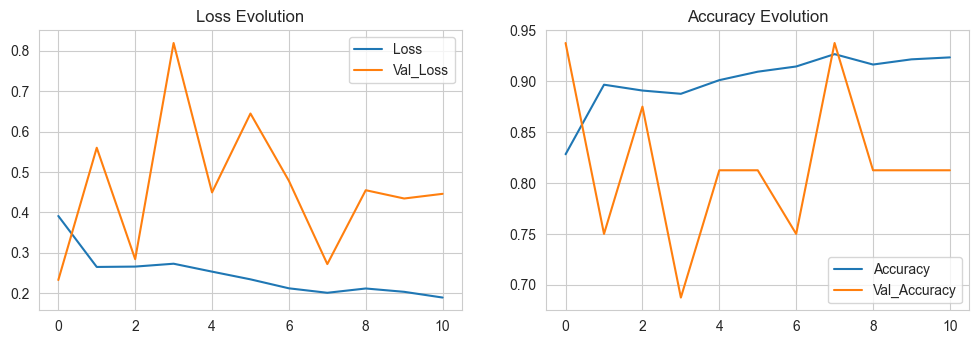

In [36]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [39]:

model.save('vgg19.keras')

In [40]:
model2.save('resnet50v2.keras')
model3.save('mobilenetv2.keras')

In [41]:
resnet_model.trainable = True
vgg_model.trainable = True
mobilenet_model.trainable = True

In [42]:

print("Number of layers in the base model: ", len(vgg_model.layers))


fine_tune_at = 100

for layer in vgg_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  22


In [43]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 20,221,765 (77.14 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 131,588 (514.02 KB)

In [44]:

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [45]:
len(model.trainable_variables)

4

In [46]:
fine_tune_epochs = 10
epochs_on_raw_model = 30

total_epochs =  epochs_on_raw_model + fine_tune_epochs

history_fine =model.fit(train,epochs=total_epochs, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.8618 - loss: 0.3155 - val_accuracy: 0.8750 - val_loss: 0.3818 - learning_rate: 0.0010
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8527 - loss: 0.3267 - val_accuracy: 0.8125 - val_loss: 0.5240 - learning_rate: 0.0010
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8644 - loss: 0.3232 - val_accuracy: 0.8750 - val_loss: 0.4088 - learning_rate: 0.0010
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8812 - loss: 0.2906 - val_accuracy: 0.8125 - val_loss: 0.3833 - learning_rate: 0.0010
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8701 - loss: 0.3054 - val_accuracy: 0.8750 - val_loss: 0.4485 - learning_rate: 0.0010
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8627 - loss: 0.3152 - val_accuracy: 0.8750 - val_loss: 0.4370 - learning_rate: 0.0010
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.8795 - loss: 0.

In [47]:

score = model.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

49/49 ━━━━━━━━━━━━━━━━━━━━ 173s 4s/step - accuracy: 0.8809 - loss: 0.3054
Train Loss:  0.2920367419719696
Train Accuracy:  0.8825032114982605
312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 252ms/step - accuracy: 0.7568 - loss: 0.4827

Test loss:  0.45503920316696167
Test Accuracy:  0.7660256624221802


Text(0.5, 1.0, 'Accuracy Evolution')

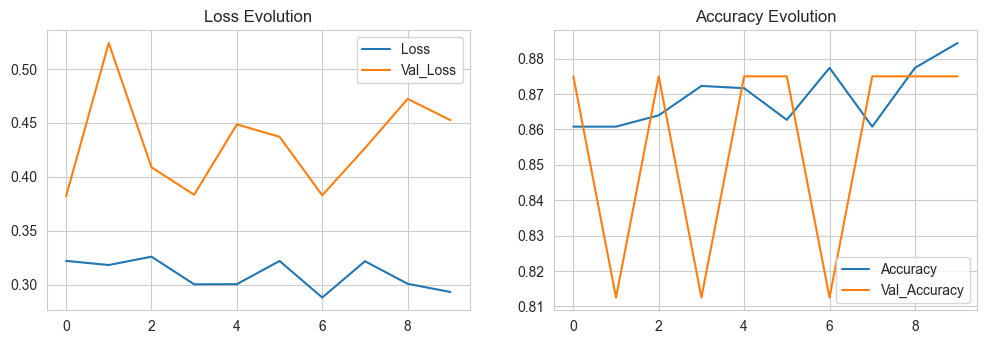

In [48]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_fine.history['loss'], label='Loss')
plt.plot(history_fine.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history_fine.history['accuracy'], label='Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [49]:




print("Number of layers in the base model: ", len(resnet_model.layers))


fine_tune_at = 100


for layer in resnet_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  190


In [50]:
model2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, None,      │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, None,      │          0 │ conv2_block1_pre… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, None,      │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, None,      │          0 │ conv2_block1_0_c

 Total params: 24,352,005 (92.90 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 524,804 (2.00 MB)

In [51]:


model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [53]:
fine_tune_epochs = 10
epochs_on_raw_model = 30

total_epochs =  epochs_on_raw_model + fine_tune_epochs

history_fine =model2.fit(train,epochs=total_epochs, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 836ms/step - accuracy: 0.9396 - loss: 0.1569 - val_accuracy: 0.9375 - val_loss: 0.2089 - learning_rate: 0.0010
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 841ms/step - accuracy: 0.9263 - loss: 0.1757 - val_accuracy: 0.8750 - val_loss: 0.3009 - learning_rate: 0.0010
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 829ms/step - accuracy: 0.9320 - loss: 0.1668 - val_accuracy: 0.8750 - val_loss: 0.3028 - learning_rate: 0.0010
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 822ms/step - accuracy: 0.9290 - loss: 0.1688 - val_accuracy: 0.9375 - val_loss: 0.1413 - learning_rate: 0.0010
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 813ms/step - accuracy: 0.9451 - loss: 0.1390 - val_accuracy: 0.8750 - val_loss: 0.1481 - learning_rate: 0.0010
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 804ms/step - accuracy: 0.9323 - loss: 0.1624 - val_accuracy: 0.9375 - val_loss: 0.1457 - learning_rate: 0.0010
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 807ms/step - accuracy: 0.9

In [54]:

score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

49/49 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9577 - loss: 0.1162
Train Loss:  0.11903269588947296
Train Accuracy:  0.9546615481376648
312/312 ━━━━━━━━━━━━━━━━━━━━ 35s 111ms/step - accuracy: 0.9074 - loss: 0.2261

Test loss:  0.2183234840631485
Test Accuracy:  0.9118589758872986


In [55]:

print("Number of layers in the base model: ", len(mobilenet_model.layers))


fine_tune_at = 100


for layer in mobilenet_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [56]:

model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [60]:
fine_tune_epochs = 10
epochs_on_raw_model = 30

total_epochs =  epochs_on_raw_model + fine_tune_epochs

history_fine =model3.fit(train,epochs=total_epochs, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 558ms/step - accuracy: 0.9130 - loss: 0.2267 - val_accuracy: 0.8750 - val_loss: 0.3457 - learning_rate: 0.0010
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 534ms/step - accuracy: 0.9227 - loss: 0.2018 - val_accuracy: 0.8125 - val_loss: 0.4786 - learning_rate: 0.0010
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 532ms/step - accuracy: 0.9193 - loss: 0.2319 - val_accuracy: 0.7500 - val_loss: 0.6803 - learning_rate: 0.0010
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 533ms/step - accuracy: 0.9283 - loss: 0.1945 - val_accuracy: 0.8125 - val_loss: 0.5208 - learning_rate: 0.0010
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 549ms/step - accuracy: 0.9146 - loss: 0.1966 - val_accuracy: 0.7500 - val_loss: 0.7318 - learning_rate: 0.0010
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 563ms/step - accuracy: 0.9180 - loss: 0.2087 - val_accuracy: 0.7500 - val_loss: 0.7667 - learning_rate: 0.0010
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 556ms/step - accuracy: 0.9

In [61]:

score = model3.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model3.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9387 - loss: 0.1629
Train Loss:  0.16846495866775513
Train Accuracy:  0.938697338104248
312/312 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8129 - loss: 0.4534

Test loss:  0.39987999200820923
Test Accuracy:  0.8397436141967773


Text(0.5, 1.0, 'Accuracy Evolution')

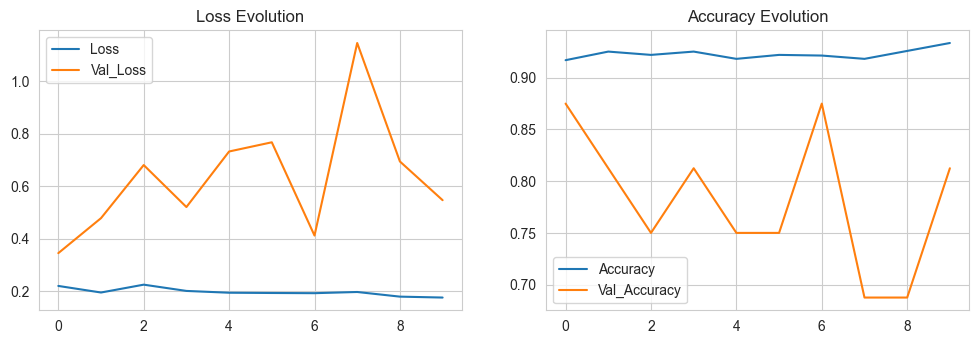

In [62]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_fine.history['loss'], label='Loss')
plt.plot(history_fine.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history_fine.history['accuracy'], label='Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [63]:

model.save('tuned_vgg19.h5')
model2.save('tuned_resnet.h5')
model3.save('tuned_mobilenet.h5')

In [2]:
import tensorflow as tf

final_model = tf.keras.models.load_model('tuned_resnet.h5')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = "C:/Users/User/Desktop/Project ML/chest_xray/test"
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)
test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )
y_pred = final_model.predict(test)

Found 624 images belonging to 2 classes.


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 35s 109ms/step


In [7]:
final_model.evaluate(test)

312/312 ━━━━━━━━━━━━━━━━━━━━ 36s 108ms/step - accuracy: 0.9105 - loss: 0.2152


[0.21832360327243805, 0.9118589758872986]

In [4]:
import tensorflow as tf

final_model = tf.keras.models.load_model('vgg19.h5')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = "C:/Users/User/Desktop/Project ML/chest_xray/test/"
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)
test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )
y_pred = final_model.predict(test)

Found 624 images belonging to 2 classes.


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 124s 398ms/step


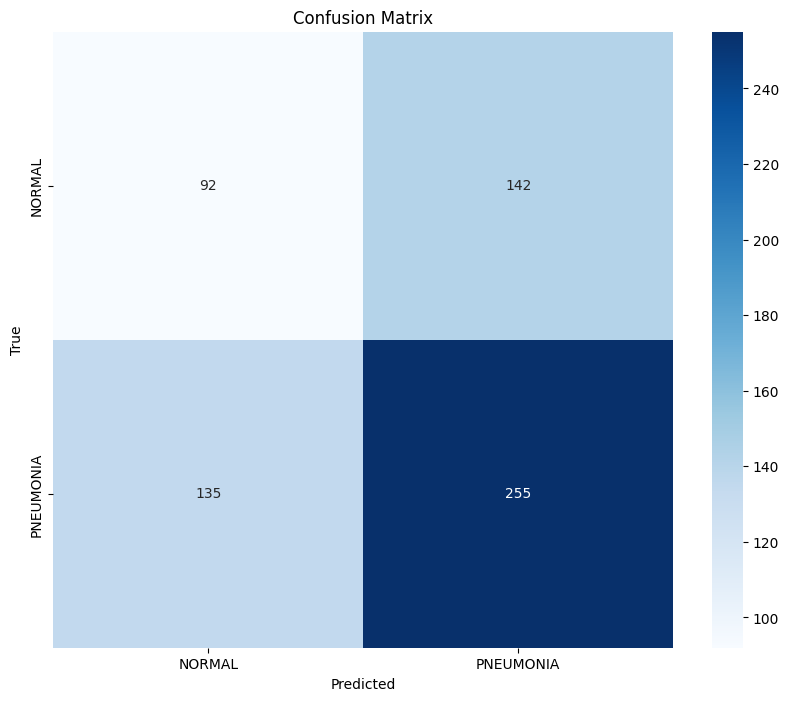

              precision    recall  f1-score   support

      NORMAL       0.41      0.39      0.40       234
   PNEUMONIA       0.64      0.65      0.65       390

    accuracy                           0.56       624
   macro avg       0.52      0.52      0.52       624
weighted avg       0.55      0.56      0.55       624



In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (y_pred > 0.5).astype(int)  


y_true = test.classes


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_true, y_pred, target_names=test.class_indices.keys()))

In [6]:
import tensorflow as tf

final_model = tf.keras.models.load_model('resnet50v2.h5')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = "C:/Users/User/Desktop/Project ML/chest_xray/test/"
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)
test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )
y_pred = final_model.predict(test)

Found 624 images belonging to 2 classes.


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 37s 115ms/step


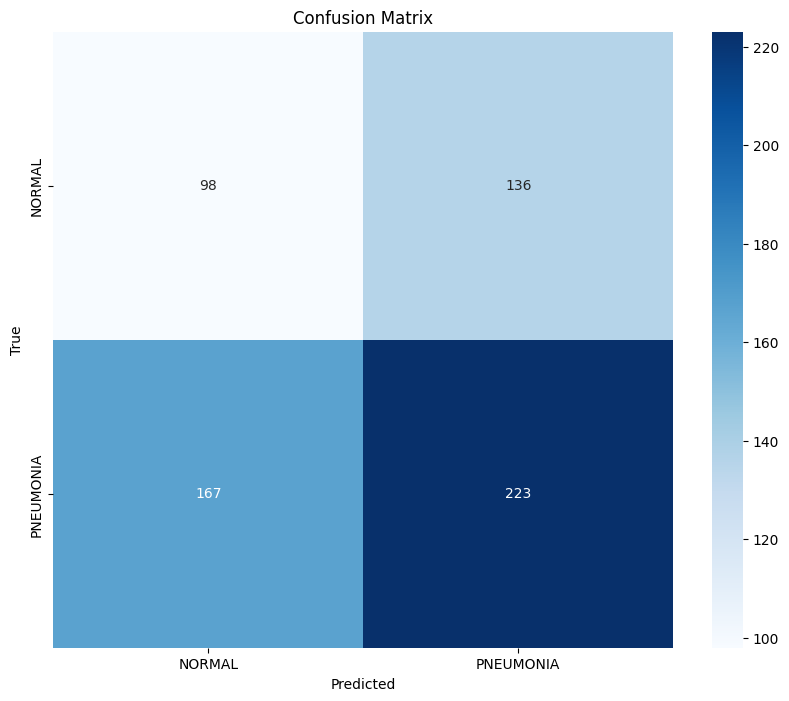

              precision    recall  f1-score   support

      NORMAL       0.37      0.42      0.39       234
   PNEUMONIA       0.62      0.57      0.60       390

    accuracy                           0.51       624
   macro avg       0.50      0.50      0.49       624
weighted avg       0.53      0.51      0.52       624



In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (y_pred > 0.5).astype(int)  


y_true = test.classes


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_true, y_pred, target_names=test.class_indices.keys()))

In [8]:
import tensorflow as tf

final_model = tf.keras.models.load_model('mobilenetv2.h5')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir = "C:/Users/User/Desktop/Project ML/chest_xray/test/"
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)
test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )
y_pred = final_model.predict(test)

Found 624 images belonging to 2 classes.


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


312/312 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step


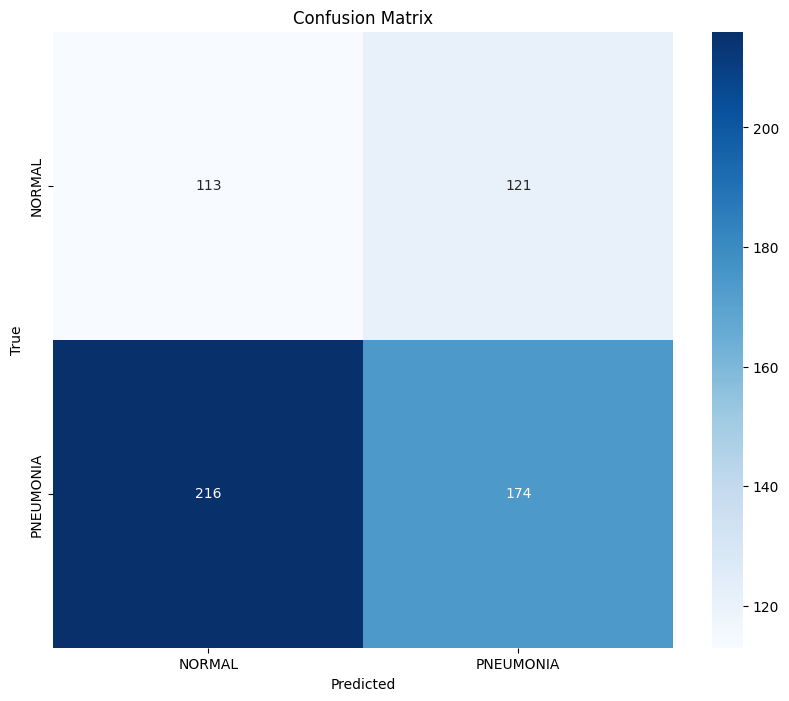

              precision    recall  f1-score   support

      NORMAL       0.34      0.48      0.40       234
   PNEUMONIA       0.59      0.45      0.51       390

    accuracy                           0.46       624
   macro avg       0.47      0.46      0.45       624
weighted avg       0.50      0.46      0.47       624



In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (y_pred > 0.5).astype(int) 


y_true = test.classes


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_true, y_pred, target_names=test.class_indices.keys()))